In [331]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [332]:

kismis_filepath=(r"C:\Users\hp\Documents\Jupyter\raisin\Raisin_Dataset\Raisin_Dataset\Raisin_Dataset.xlsx")
kismis_data = pd.read_excel(kismis_filepath)
kismis_data['Class']= kismis_data["Class"].apply(lambda x:1 if x == 'Kecimen' else 0)
kismis_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


In [333]:
kismis_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [334]:
X = kismis_data.drop(["Class"],axis =1)
scaler = StandardScaler()
y = kismis_data["Class"]
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size = 0.2)



In [335]:
BATCH_SIZE = 8

train = (
    tf.data.Dataset.from_tensor_slices((X_train,y_train))
    .batch(BATCH_SIZE)
    .prefetch(buffer_size = tf.data.AUTOTUNE)
)
test = (
    tf.data.Dataset.from_tensor_slices((X_test,y_test))
    .batch(BATCH_SIZE)
    .prefetch(buffer_size = tf.data.AUTOTUNE)
)
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=30),
    tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
]

In [336]:
input = tf.keras.Input(shape = (X.shape[1],)) #maksud .shape[1] = banyak kolom fitur

UNIT= 16

x= tf.keras.layers.Dense(units=UNIT, activation='leaky_relu')(input)
x= tf.keras.layers.Dense(units=UNIT, activation='sigmoid')(x)
x= tf.keras.layers.Dense(units=UNIT, activation='relu')(x)
x= tf.keras.layers.Dense(units=UNIT, activation='leaky_relu')(x)



output = tf.keras.layers.Dense(units=1, activation='sigmoid')(x)

kismis_model = tf.keras.Model(inputs = input , outputs =  output)
kismis_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.03),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ["accuracy"],
)



In [337]:
history = kismis_model.fit(train,
                    validation_data = test,
                    epochs = 200,
                    callbacks = callbacks
                    )

Epoch 1/200
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7744 - loss: 0.4670 - val_accuracy: 0.8556 - val_loss: 0.3718
Epoch 2/200
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8380 - loss: 0.4426 - val_accuracy: 0.8833 - val_loss: 0.3314
Epoch 3/200
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.8502 - loss: 0.4080 - val_accuracy: 0.8778 - val_loss: 0.3330
Epoch 4/200
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8433 - loss: 0.4089 - val_accuracy: 0.8667 - val_loss: 0.3257
Epoch 5/200
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8233 - loss: 0.4000 - val_accuracy: 0.8722 - val_loss: 0.3169
Epoch 6/200
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8394 - loss: 0.3915 - val_accuracy: 0.8722 - val_loss: 0.3231
Epoch 7/200
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8391 - loss: 0.4006 - val_accuracy: 0.8778 - val_loss: 0.3112
Epoch 8/200
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8509 - loss: 0.3863 - val_accuracy: 0.8889 -

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


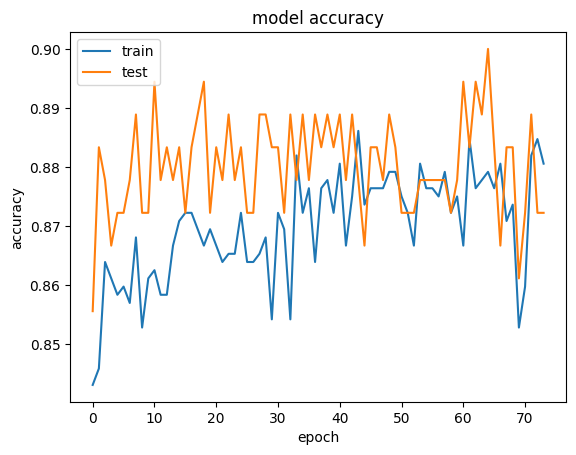

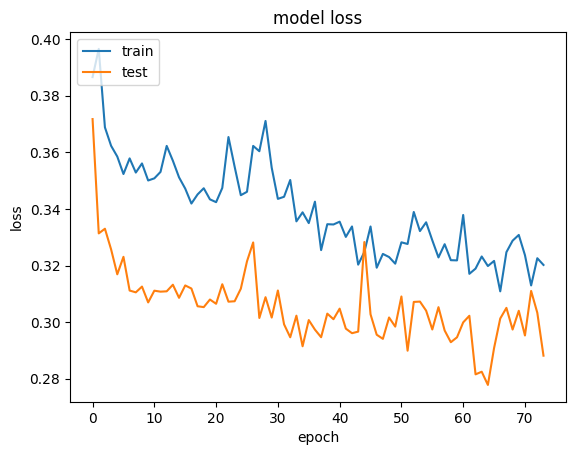

In [338]:

import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [339]:
best_model = tf.keras.models.load_model('best_model.keras')
y_predict = best_model.predict(X_test) >0.5


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [340]:
y_test

563    0
552    0
439    1
169    1
152    1
      ..
490    0
646    0
356    1
230    1
384    1
Name: Class, Length: 180, dtype: int64

In [341]:
print(f"Akurasi: {accuracy_score(y_test, y_predict)}")
print(f"F1-Score: {f1_score(y_test, y_predict)}")

Akurasi: 0.9
F1-Score: 0.8941176470588234
